In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [4]:
df_pump_features = pd.read_csv("Features/df_pump_feature.csv")
df_pump_target = pd.read_csv("Features/df_pump_target.csv")

In [5]:
X = df_pump_features
y = df_pump_target.values.ravel()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

C:\Users\gulce\anaconda3\envs\mimii\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.89357923 0.90596528        nan        nan        nan 0.89357923
 0.90527143        nan        nan        nan 0.89357923 0.90467678
        nan        nan        nan 0.89357923 0.90546959        nan
        nan        nan]
  warnings.warn(


Best parameter (CV score=0.906):
{'logistic__C': 0.0001, 'pca__n_components': 15}


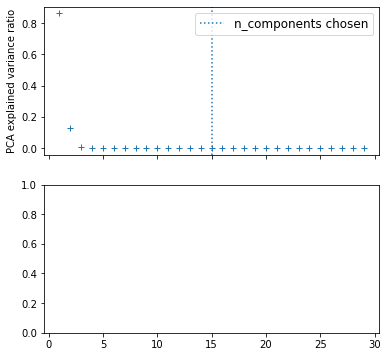

In [8]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [9]:
from sklearn.metrics import classification_report
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.17      0.28       275
           1       0.91      0.99      0.95      2248

    accuracy                           0.90      2523
   macro avg       0.81      0.58      0.61      2523
weighted avg       0.89      0.90      0.87      2523

